
🔹 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282355 entries, 0 to 1282354
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Date received                 1282355 non-null  object
 1   Product                       1282355 non-null  object
 2   Sub-product                   1047189 non-null  object
 3   Issue                         1282355 non-null  object
 4   Sub-issue                     751169 non-null   object
 5   Consumer complaint narrative  383564 non-null   object
 6   Company public response       449082 non-null   object
 7   Company                       1282355 non-null  object
 8   State                         1262955 non-null  object
 9   ZIP code                      1167057 non-null  object
 10  Tags                          175643 non-null   object
 11  Consumer consent provided?    690654 non-null   object
 12  Submitted via        

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460


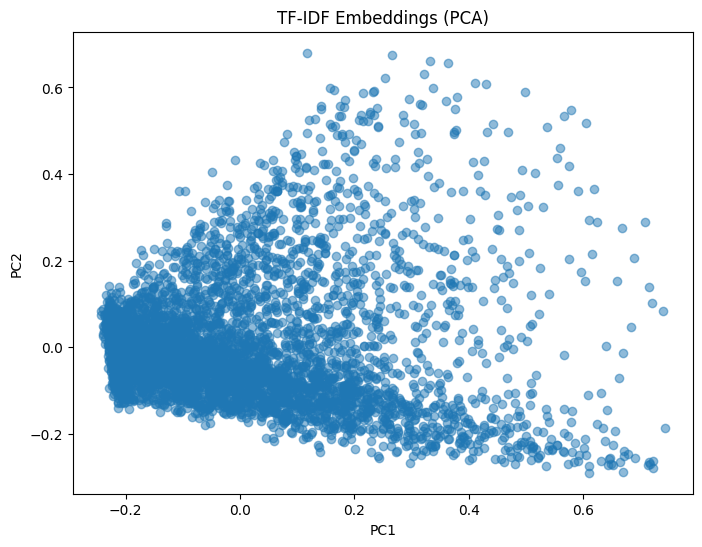

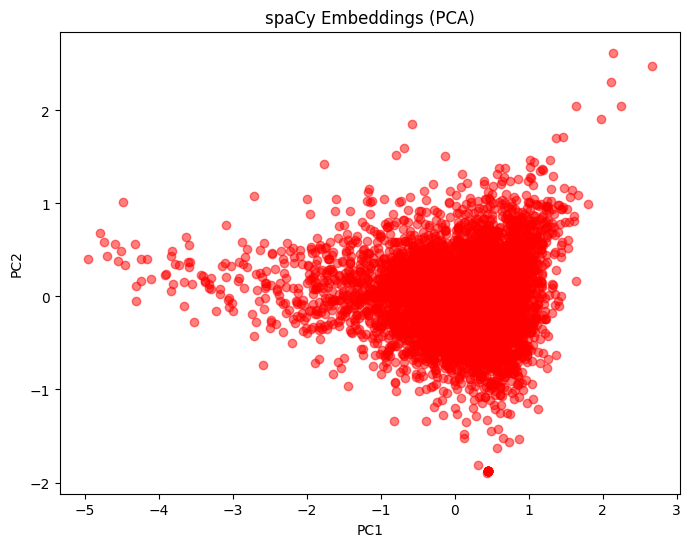

Most similar complaints (TF-IDF): (241, 4296)
Complaint 1: equifax mishandle information lead breach put million potential risk extremely disappointed equifax handle report breach little notify public nearly month breach detect receive email letter phone instead discover social medium
Complaint 2: equifax mishandle information lead breach put million potential risk extremely disappointed equifax handle report breach little notify public nearly month breach detect receive email letter phone instead discover social medium
Cluster 0 top words: xxxx, xx, call, tell, credit, account, payment, time, pay, loan
Cluster 1 top words: payment, xxxx, account, loan, credit, pay, bank, fee, card, debt
Cluster 2 top words: xxxx, xx, report, credit, account, inquiry, address, remove, equifax, information
Cluster 3 top words: report, credit, xxxx, information, account, dispute, equifax, debt, send, remove
Cluster 4 top words: xxxx, xx, account, credit, report, payment, debt, pay, collection, dispute

🔹

In [6]:
# Import necessary libraries
import pandas as pd
import spacy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA, LatentDirichletAllocation, NMF
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
from wordcloud import WordCloud

# Load dataset
file_path = r"C:\projects\rows.csv"
df = pd.read_csv(file_path, low_memory=False)

# Display dataset info & first few rows (ensures this is output first)
print("\n🔹 Dataset Overview:")
df.info()
print("\n🔹 Sample Data:")
display(df.head())  # Ensures this appears in Jupyter Notebook

# Handle missing values
df = df.dropna(subset=["Consumer complaint narrative"])
df.fillna({"Company public response": "No response", 
           "Tags": "No tags", 
           "Consumer consent provided?": "Unknown"}, inplace=True)

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Preprocessing function
def preprocess_text(text):
    if pd.isnull(text):

        return ""
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return " ".join(tokens)

# Apply preprocessing
df_sample = df.sample(5000, random_state=42)
df_sample["cleaned_text"] = df_sample["Consumer complaint narrative"].apply(preprocess_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_sample["cleaned_text"].dropna())

# SpaCy Embeddings
nlp_md = spacy.load("en_core_web_md")

def get_spacy_embedding(text):
    doc = nlp_md(text)
    return doc.vector

df_sample["spacy_embedding"] = df_sample["cleaned_text"].dropna().apply(get_spacy_embedding)
spacy_embeddings = np.vstack(df_sample["spacy_embedding"].dropna().values)

# Dimensionality Reduction (PCA)
pca_tfidf = PCA(n_components=2)
tfidf_2d = pca_tfidf.fit_transform(tfidf_matrix.toarray())

pca_spacy = PCA(n_components=2)
spacy_2d = pca_spacy.fit_transform(spacy_embeddings)

# Visualize TF-IDF & spaCy Embeddings
plt.figure(figsize=(8, 6))
plt.scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], alpha=0.5)
plt.title("TF-IDF Embeddings (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(spacy_2d[:, 0], spacy_2d[:, 1], alpha=0.5, color='red')
plt.title("spaCy Embeddings (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Cosine Similarity (TF-IDF)
tfidf_cosine_sim = cosine_similarity(tfidf_matrix)
np.fill_diagonal(tfidf_cosine_sim, 0)
most_similar_idx = np.unravel_index(np.argmax(tfidf_cosine_sim), tfidf_cosine_sim.shape)

print(f"Most similar complaints (TF-IDF): {most_similar_idx}")
print(f"Complaint 1: {df_sample.iloc[most_similar_idx[0]]['cleaned_text']}")
print(f"Complaint 2: {df_sample.iloc[most_similar_idx[1]]['cleaned_text']}")

# Clustering with K-Means
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_sample["cluster"] = kmeans.fit_predict(spacy_embeddings)

# Extract Top Words Per Cluster
clusters = df_sample["cluster"].values
cluster_tfidf = np.zeros((num_clusters, tfidf_matrix.shape[1]))

for i in range(num_clusters):
    cluster_tfidf[i] = tfidf_matrix[clusters == i].mean(axis=0)

top_n = 10
feature_names = tfidf_vectorizer.get_feature_names_out()

for i in range(num_clusters):
    top_words_idx = cluster_tfidf[i].argsort()[-top_n:][::-1]
    top_words = [feature_names[j] for j in top_words_idx]
    print(f"Cluster {i} top words: {', '.join(top_words)}")

# Topic Modeling (LDA)
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count_matrix = count_vectorizer.fit_transform(df_sample["cleaned_text"])

num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(count_matrix)

lda_feature_names = count_vectorizer.get_feature_names_out()

# Topic Modeling (NMF)
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(tfidf_matrix)

nmf_feature_names = tfidf_vectorizer.get_feature_names_out()

def display_topics(model, feature_names, num_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))

print("\n🔹 Topics extracted using LDA:")
display_topics(lda, lda_feature_names)

print("\n🔹 Topics extracted using NMF:")
display_topics(nmf, nmf_feature_names)

# LDA Visualization
dictionary = corpora.Dictionary(df_sample["cleaned_text"].str.split())
corpus = [dictionary.doc2bow(text) for text in df_sample["cleaned_text"].str.split()]

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=10,
    per_word_topics=True
)

lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

